## Cell 1: Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


## Cell 2: Load & Preprocess MNIST Data

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = np.expand_dims(x_train, -1)  # shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## Cell 3: Visualize Sample Digits

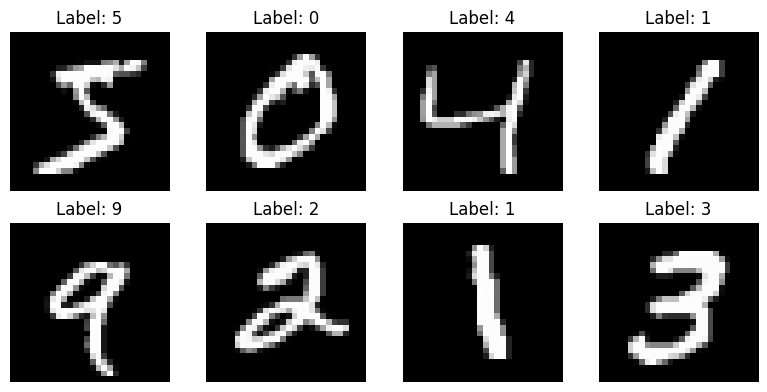

In [3]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Cell 4: Build CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/Users/mac/Desktop/mnist_digit_classifier/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Cell 5: Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9481 - loss: 0.1695 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9832 - loss: 0.0526 - val_accuracy: 0.9851 - val_loss: 0.0486
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9861 - val_loss: 0.0507
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9869 - val_loss: 0.0440
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9929 - loss: 0.0202 - val_accuracy: 0.9881 - val_loss: 0.0432


## Cell 6: Evaluate the Model


In [7]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred, average='weighted'))
print("✅ Recall:", recall_score(y_test, y_pred, average='weighted'))
print("✅ F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Accuracy: 0.9901
✅ Precision: 0.9901556761763708
✅ Recall: 0.9901
✅ F1 Score: 0.9900935984055265

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Evaluation Summary:
The model was evaluated on 1,000 test images using four metrics: accuracy, precision, recall, and F1-score. The results show the model performs with over 99% on all metrics, demonstrating excellent generalization.

## Cell 7: Save the Model

In [9]:
model.save('../models/mnist_model.h5')
print("Model saved to models/mnist_model.h5 successfully.")
# Visualize some predictions


Model saved to models/mnist_model.h5 successfully.


## 📊 Data Visualizations and Interpretations
This section visualizes and interprets key aspects of the MNIST dataset and model performance.


### 1️⃣ Class Distribution

This shows how many samples are present for each digit (0–9) in the training set. A balanced class distribution helps prevent model bias.



In [17]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


/var/folders/xl/tfd_qtks3zv324nb_q5p53ym0000gn/T/ipykernel_56802/1034349648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


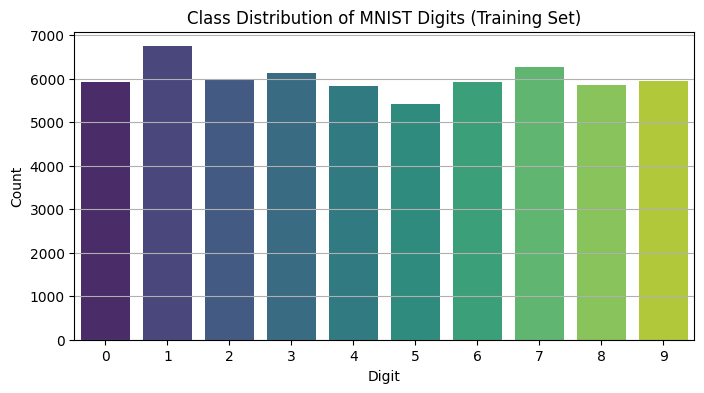

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, palette="viridis")
plt.title("Class Distribution of MNIST Digits (Training Set)")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()




### 2️⃣ Average Digit Images
By calculating the average pixel intensity of all images per digit class, we can visualize what the model “thinks” a typical 0, 1, ..., 9 looks like.



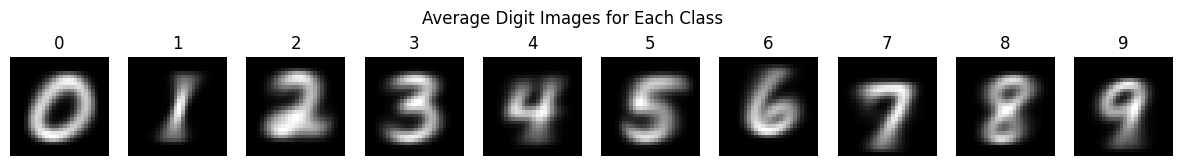

In [19]:
import numpy as np

digit_means = []
for i in range(10):
    images = x_train[y_train == i]
    avg_image = np.mean(images, axis=0)
    digit_means.append(avg_image)

# Plot average images
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(digit_means[i], cmap='gray')
    ax.set_title(f"{i}")
    ax.axis('off')

plt.suptitle("Average Digit Images for Each Class")
plt.show()


### 3️⃣ Confusion Matrix
The confusion matrix helps evaluate classification performance by showing how often predictions match the actual labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


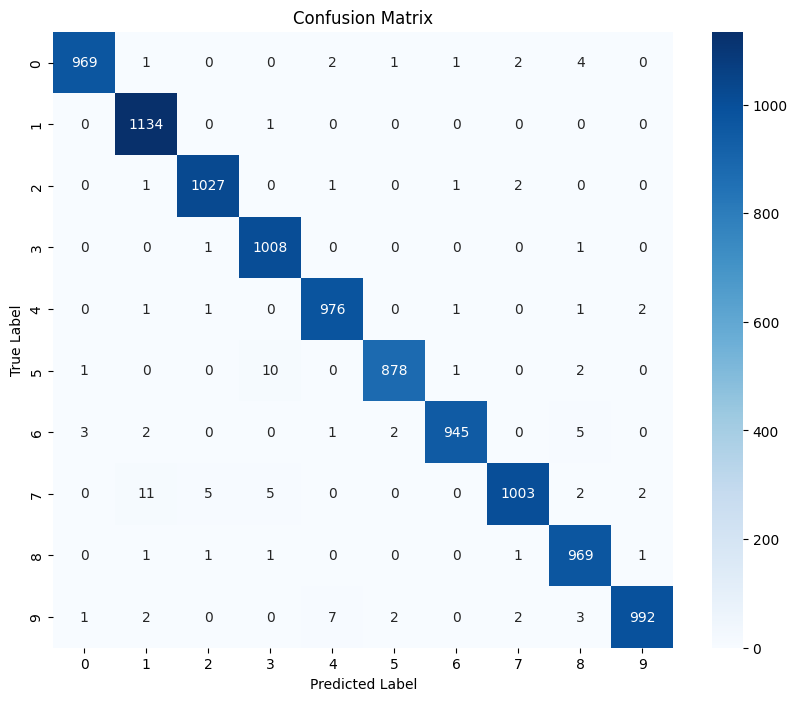

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Preprocess test set
x_test_scaled = x_test / 255.0
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

# Predict
y_pred = model.predict(x_test_scaled).argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
